In [1]:
import numpy as np
import matplotlib.pyplot as plt

filename_list = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_10V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_60V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt']

def extract_data(filename_list):  
    datastore = {}
    for filename in filename_list:
        with open (filename, 'r') as f:
            filenameparts = filename.split('_')
            voltage = filenameparts[4].replace('V', '')
            voltage = int(voltage)
            arrtime = []
            intensity = []
            for dataline in f:
                dataline = dataline.replace('\n', '')
                arrtime_intensity = dataline.split('\t')
                arrtime.append(float(arrtime_intensity[0]))
                intensity.append(float(arrtime_intensity[1]))   
            intensity_smaller = [n/100 for n in intensity]    
            x = np.array(arrtime)
            y = np.array(intensity_smaller)
            #hist_list = []
            #for index, intensity in enumerate(y):
                #time = x[index]
                #hist_list += [time]*int(intensity)
            #hist_arr = np.array(hist_list)
            datastore[voltage] = (x,y)
    return datastore

datastore = extract_data(filename_list)

histdatastore = dict.fromkeys(datastore)

for key, (x,y) in datastore.items():
    histdata = []
    for index, intensity in enumerate(y):
        time = x[index]
        histdata += [time]*int(intensity)
    histarr = np.array(histdata)
    histarr = histarr.reshape(-1,1)
    histdatastore[key] = histarr
    
key_to_value_lengths = {k:len(v) for k, v in histdatastore.items()}
print(key_to_value_lengths)


{0: 5649, 10: 35222, 20: 9036, 30: 16842, 40: 12792, 50: 10349, 60: 2471, 70: 209}


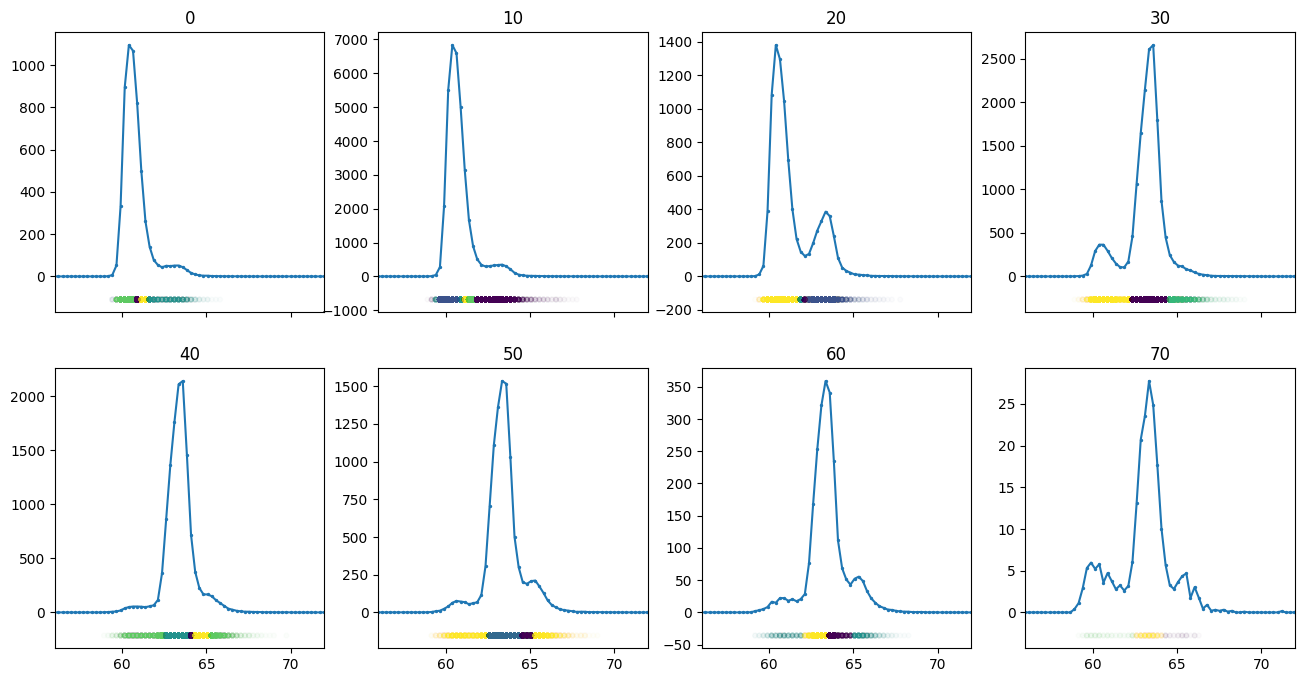

In [2]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

#spec = gridspec.GridSpec(ncols=4, nrows=6, width_ratios=[4,4,4,4], wspace=0.5,hspace=0.5, height_ratios=[4,1,1,4,1,1])
fig, axarr = plt.subplots(2,4, sharex = True, sharey=False)
fig.set_size_inches(16, 8)
row = 0
col = 0

for key, (x,y) in datastore.items():
    ax = axarr[row, col]
    ax.scatter(x,y, s=2, alpha = 1.0, zorder=0)
    ax.plot(x,y, alpha = 1.0, zorder=0)
    ax.set_xlim(56,72)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1

row = 0
col = 0
for key, array in histdatastore.items():
    gm = GaussianMixture(n_components=5, max_iter=100, init_params='random', 
                         covariance_type='full', random_state=0).fit(array) #default init kmeans
    labels = gm.predict(array)
    y = datastore[key][1]
    fake_y = [-0.1*y.max()]*len(labels)
    ax = axarr[row, col]
    ax.scatter(array, fake_y, c=labels, s=12, cmap='viridis',alpha=0.02, zorder=1)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1        
        
plt.show()

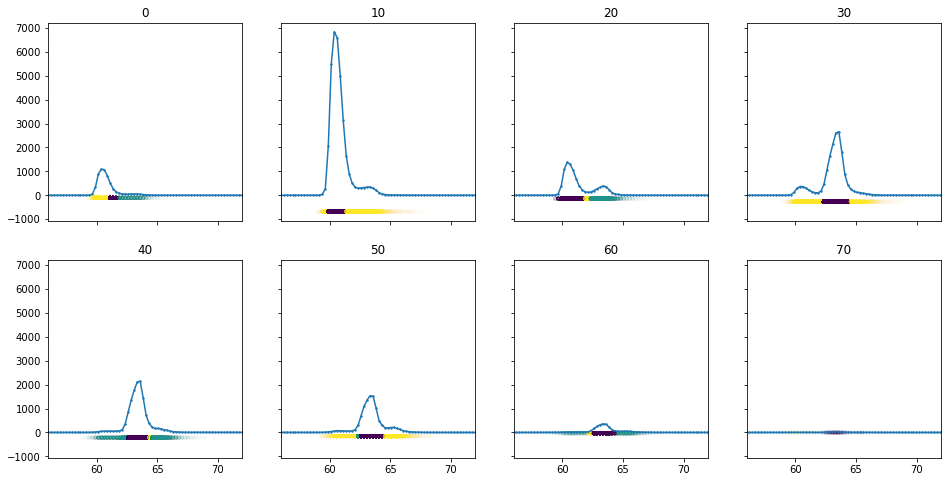

In [13]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

#spec = gridspec.GridSpec(ncols=4, nrows=6, width_ratios=[4,4,4,4], wspace=0.5,hspace=0.5, height_ratios=[4,1,1,4,1,1])
fig, axarr = plt.subplots(2,4, sharex = True, sharey=True)
fig.set_size_inches(16, 8)
row = 0
col = 0

for key, (x,y) in datastore.items():
    ax = axarr[row, col]
    ax.scatter(x,y, s=2, alpha = 1.0)
    ax.plot(x,y, alpha = 1.0)
    ax.set_xlim(56,72)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1

row = 0
col = 0
for key, array in histdatastore.items():
    gm = GaussianMixture(n_components=3, max_iter=100, init_params='random', 
                         covariance_type='diag', random_state=0).fit(array) #default init kmeans
    labels = gm.predict(array)
    y = datastore[key][1]
    fake_y = [-0.1 * y.max()]*len(labels)
    ax = axarr[row, col]
    ax.scatter(array, fake_y, c=labels, s=12, cmap='viridis',alpha=0.02)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1        
        
plt.show()

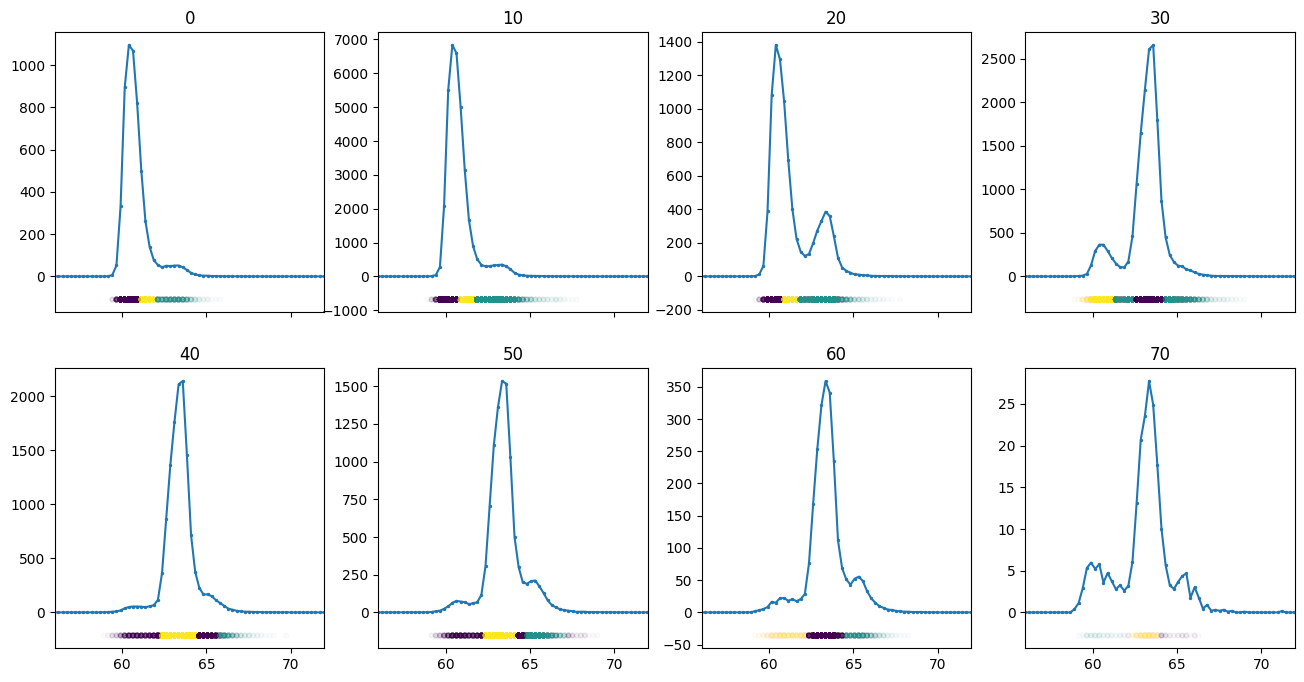

In [3]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

#spec = gridspec.GridSpec(ncols=4, nrows=6, width_ratios=[4,4,4,4], wspace=0.5,hspace=0.5, height_ratios=[4,1,1,4,1,1])
fig, axarr = plt.subplots(2,4, sharex = True, sharey=False)
fig.set_size_inches(16, 8)
row = 0
col = 0

for key, (x,y) in datastore.items():
    ax = axarr[row, col]
    ax.scatter(x,y, s=2, alpha = 1.0)
    ax.plot(x,y, alpha = 1.0)
    ax.set_xlim(56,72)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1

row = 0
col = 0
for key, array in histdatastore.items():
    gm = GaussianMixture(n_components=3, max_iter=100, init_params='kmeans', 
                         covariance_type='full', random_state=0).fit(array) #default init kmeans
    labels = gm.predict(array)
    y = datastore[key][1]
    fake_y = [-0.1 * y.max()]*len(labels)
    ax = axarr[row, col]
    ax.scatter(array, fake_y, c=labels, s=12, cmap='viridis',alpha=0.02)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1        
        
plt.show()

C:\Users\tempeparsons\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


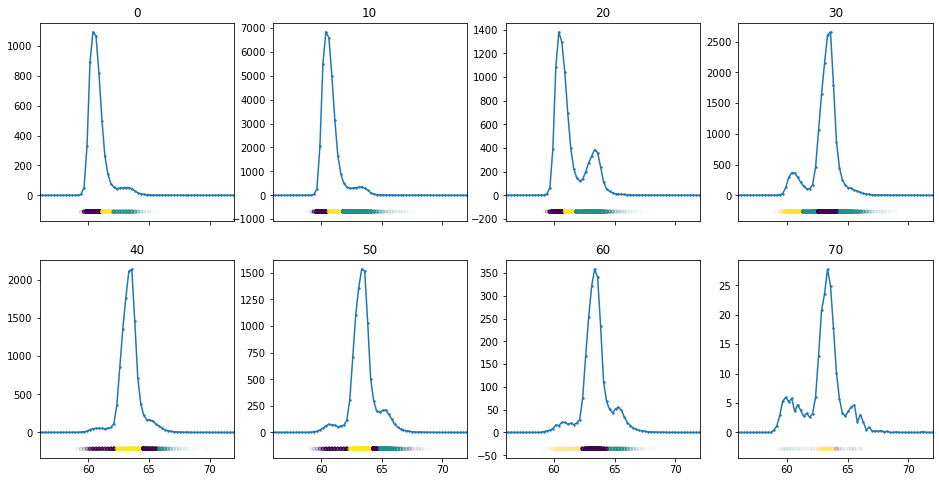

In [11]:
fig, axarr = plt.subplots(2,4, sharex = True, sharey=False)
fig.set_size_inches(16, 8)
row = 0
col = 0

for key, (x,y) in datastore.items():
    ax = axarr[row, col]
    ax.scatter(x,y, s=2, alpha = 1.0, zorder=0)
    ax.plot(x,y, alpha = 1.0, zorder=0)
    ax.set_xlim(56,72)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1

row = 0
col = 0

for key, array in histdatastore.items():
    gm = GaussianMixture(n_components=3, max_iter=100, init_params='kmeans', 
                         covariance_type='full', random_state=0).fit(array) #default init kmeans
    labels = gm.predict(array)
    y = datastore[key][1]
    fake_y = [-0.1*y.max()]*len(labels)
    ax = axarr[row, col]
    ax.scatter(array, fake_y, c=labels, s=12, cmap='viridis',alpha=0.02, zorder=1)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1        
        
plt.show()

C:\Users\tempeparsons\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


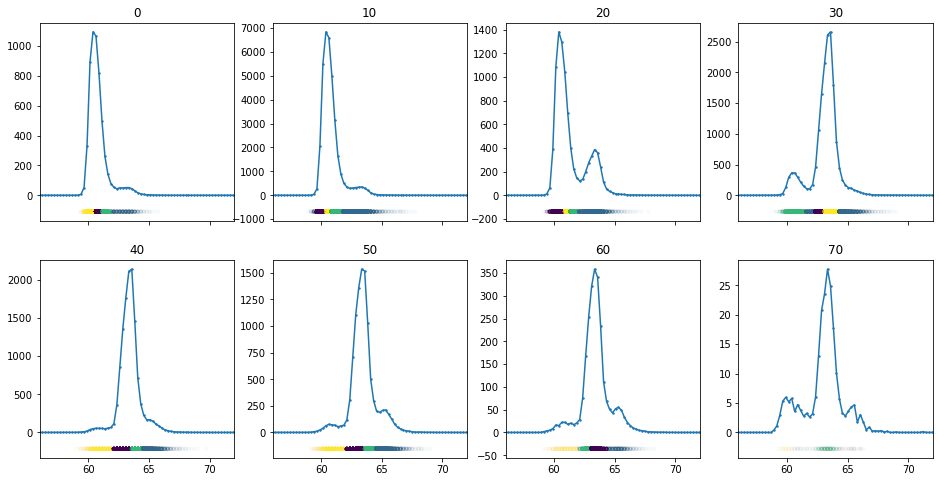

In [12]:
fig, axarr = plt.subplots(2,4, sharex = True, sharey=False)
fig.set_size_inches(16, 8)
row = 0
col = 0

for key, (x,y) in datastore.items():
    ax = axarr[row, col]
    ax.scatter(x,y, s=2, alpha = 1.0, zorder=0)
    ax.plot(x,y, alpha = 1.0, zorder=0)
    ax.set_xlim(56,72)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1

row = 0
col = 0

for key, array in histdatastore.items():
    gm = GaussianMixture(n_components=4, max_iter=100, init_params='kmeans', 
                         covariance_type='full', random_state=0).fit(array) #default init kmeans
    labels = gm.predict(array)
    y = datastore[key][1]
    fake_y = [-0.1*y.max()]*len(labels)
    ax = axarr[row, col]
    ax.scatter(array, fake_y, c=labels, s=12, cmap='viridis',alpha=0.02, zorder=1)
    ax.set_title(key)
    col += 1
    if col == 4:
        col = 0
        row += 1        
        
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 8)

modelstore = {}
for key, (x,y) in datastore.items():
    xy = np.column_stack((x,y))
    model = [GaussianMixture(n, covariance_type='full', random_state=0).fit(xy) for n in n_components]
    modelstore[key] = model

#print(list(modelstore.values())[0])

fig, axarr = plt.subplots(2,4, sharex = True, sharey=False)
fig.set_size_inches(14, 6)
row = 0
col = 0

for key, model in modelstore.items():
    ax = axarr[row, col]
    ax.plot(n_components, [m.bic(xy) for m in model], label='BIC')
    ax.plot(n_components, [m.aic(xy) for m in model], label='AIC')
    ax.set_title(key)
    for ax in axarr.flat:
        ax.set(xlabel='n_components')
    col += 1
    if col == 4:
        col = 0
        row += 1
plt.show()

#remember that this is on non-hist format data
#does it change when we do it in hist format?
#best number of components isn't consistent. Presumably this becomes moot point when all peak picking done in 2D?


In [ ]:

histdatastore = dict.fromkeys(datastore)
#histkeys = list(histstore.keys())
#print(histkeys)

for key, (x,y) in datastore.items():
    histdata = []
    #print(y)
    for index, intensity in enumerate(y):
        time = x[index]
        histdata += [time]*int(intensity/100.0)
    histarr = np.array(histdata)
    #histarr = histarr/1000
    histarr = histarr.reshape(-1,1)
    #print(len(histdata))
    histdatastore[key] = histarr
    
key_to_value_lengths = {k:len(v) for k, v in histdatastore.items()}
print(key_to_value_lengths)

In [ ]:
import numpy as np

histmodelstore = {}
n_components = np.arange(1, 8)

for key, value in histdatastore.items():
    histmodel = [GaussianMixture(n, covariance_type='full', random_state=0).fit(histarr) for n in n_components]
    histmodelstore[key] = histmodel

fig, axarr = plt.subplots(2,4, sharex = True, sharey=False)
fig.set_size_inches(14, 6)
row = 0
col = 0

for histkey, histmodel in histmodelstore.items():
    ax = axarr[row, col]
    ax.plot(n_components, [h.bic(histarr) for h in histmodel], label='BIC')
    ax.plot(n_components, [h.aic(histarr) for h in histmodel], label='AIC')
    ax.set_title(histkey)
    for ax in axarr.flat:
        ax.set(xlabel='n_components')
    col += 1
    if col == 4:
        col = 0
        row += 1
plt.show()
##not sure that it makes sense to do this on the 'fake histogram' data but I'm doing it anyway. 